In [151]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [152]:
# pandas
import pandas as pd
def df2np(df,  gpu, model,):
    df = df.loc[(df['Model'] == model) & (df['GPU'] == gpu)].iloc[0,2:]
    x = df.to_numpy().astype(float).T
    x[[1, 3]] = 1000/x[[1, 3]]
    return x

# Load Knee results
df = pd.read_excel('memory_and_speed.xlsx')

unt_008M = df2np(df, 1, 'U-Net-8M')
unt_031M = df2np(df, 1, 'U-Net-31M')
unt_124M = df2np(df, 1, 'U-Net-124M')

vit_008M = df2np(df, 1, 'ViT-8M/10')
vit_032M = df2np(df, 1, 'ViT-32M/10')
vit_060M = df2np(df, 1, 'ViT-60M/10')

cpu_unt_008M = df2np(df, 0, 'U-Net-8M')
cpu_unt_031M = df2np(df, 0, 'U-Net-31M')
cpu_unt_124M = df2np(df, 0, 'U-Net-124M')

cpu_vit_008M = df2np(df, 0, 'ViT-8M/10')
cpu_vit_032M = df2np(df, 0, 'ViT-32M/10')
cpu_vit_060M = df2np(df, 0, 'ViT-60M/10')



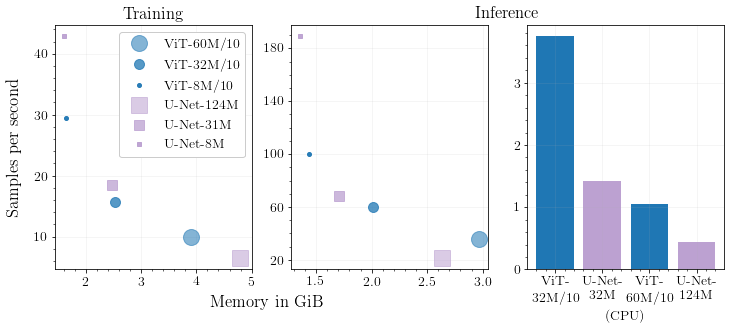

In [205]:
w, h = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 3, figsize=(2*w, h))

""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

""" Training """
ax = axes[0]
ax.plot(vit_060M[0], vit_060M[1], vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label=vitl.label, zorder=6)
ax.plot(vit_032M[0], vit_032M[1], vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=vitm.color, label=vitm.label, zorder=5)
ax.plot(vit_008M[0], vit_008M[1], vits.marker, markersize=vits.ms, alpha=vits.oc, color=vits.color, label=vits.label, zorder=4)
ax.plot(unt_124M[0], unt_124M[1], untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label=untl.label, zorder=3)
ax.plot(unt_031M[0], unt_031M[1], untm.marker, markersize=untm.ms, alpha=untm.oc, color=untm.color, label=untm.label, zorder=2)
ax.plot(unt_008M[0], unt_008M[1], unts.marker, markersize=unts.ms, alpha=unts.oc, color=unts.color, label=unts.label, zorder=1)
ax.set_xticks([2, 3, 4, 5])
ax.set_title('Training')
ax.legend()

""" Test """
ax = axes[1]
ax.plot(vit_060M[2], vit_060M[3], vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label=vitl.label, zorder=6)
ax.plot(vit_032M[2], vit_032M[3], vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=vitm.color, label=vitm.label, zorder=5)
ax.plot(vit_008M[2], vit_008M[3], vits.marker, markersize=vits.ms, alpha=vits.oc, color=vits.color, label=vits.label, zorder=4)
ax.plot(unt_124M[2], unt_124M[3], untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label=untl.label, zorder=3)
ax.plot(unt_031M[2], unt_031M[3], untm.marker, markersize=untm.ms, alpha=untm.oc, color=untm.color, label=untm.label, zorder=2)
ax.plot(unt_008M[2], unt_008M[3], unts.marker, markersize=unts.ms, alpha=unts.oc, color=unts.color, label=unts.label, zorder=1)

ax.set_yticks([ 20.,  60., 100., 140., 180.])
ax.set_title('Inference', x=1.1)

# ax.legend()

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',  bbox_to_anchor = (0.12,-0.1,1,1))

""" Test CPU """
ax = axes[2]
models = ['ViT-\n32M/10', 'U-Net-\n32M', 'ViT-\n60M/10', 'U-Net-\n124M']
speeds = [cpu_vit_032M[3], cpu_unt_031M[3], cpu_vit_060M[3],cpu_unt_124M[3]]
ax.bar(models[0], speeds[0], color = vitl.color)
ax.bar(models[1], speeds[1], color = untl.color)
ax.bar(models[2], speeds[2], color = vitm.color)
ax.bar(models[3], speeds[3], color = untm.color)
ax.set_xlabel('(CPU)')
ax.set_yticks([0, 1,  2, 3])
# ax.set_title('CPU')

# Labels
fig.supxlabel('Memory in GiB', y=0.0, x=0.37)
fig.supylabel('Samples per second', x=0.07, y=0.5)

## Save
# fig.tight_layout()
fig.savefig('speed_memory.pdf', format="pdf", bbox_inches = 'tight')